<a href="https://colab.research.google.com/github/STRMNGnwo/CT5133-DeepLearning/blob/main/DeepLearningAssignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CT5133 - Assignment 1

  -Submitted by Srinivas Ilancheran (19280039) and Lukasz Szemet (19502109) of the MSc Artificial Intelligence programme



# Assignment Sections:

### Section 1

**Instructions:**

Implement Logistic Regression (Topic 2):
  1. Use Jupyter Notebook (Python or R) to implement a neural network approach to logistic regression (no hidden layers, one output node)
  2. Your code should follow my notes to implement the algorithm from scratch.
  3. Your notebook should include a brief description of the algorithm, with all references.
  4. Your code must handle different numbers of inputs and different numbers of training cases, but you don't have to support more than one binary output node

**Explanation of the Logistic Regression algorithm:**

Logistic Regression is an algorithm used for binary classification problems, where the goal is to predict the probability that an instance belongs to a certain class. Despite its name, logistic regression is a classification algorithm rather than a regression algorithm. It borrows from regression concepts and uses a linear function to model the relationship between the independent variables (features) and the dependent variable (outcome). The modelling of this relationship is represented as a line/plane that is used in feature space to linearly separate the data into different classes.

It involves computing a weighted sum of the features of a data sample (the independent variables) and passing the weighted sum into a logistic function (some examples include sigmoidal, tanh etc) to obtain a probability logit value. This value is then thresholded (the value of can be decided by the user) to obtain a prediction of the depedent variable's value.

**Implementation details:**

We decided to implement the single neuron that implements the Logistic Regression algorithm as a Python class, in the hopes of making the code as reusable as possible. The class is representative of the neuron and each instance of the class acts as a separate self-contained neuron.

1. The constructor for the class takes in 1 argument- the shape of the input data. The constructor expects the value of this arguement to be a tuple, the value of which is used to initialise the matrix of weights that is used to compute the weighted sum of the inputs. The values of the matrix itself are initialised with random weights.

2. The weighted_sum_func() function of the class takes in the input data and returns the result of the dot product of the input and the neuron's weights matrix.

3. The activation_func() function of the class takes in input and returns the result of the input being passed through an implementation of a sigmoid activation function.


4. The forward() function is used to simulate a forward pass of the data through a neuron. The input data is passed to the forward function, which in turns calls the weighted_sum_func() on it. The output of the weighted_sum_func() is then sent to the activation_func() function which returns the output of the sigmoid activation function. This output is then returned as the output of the neuron.


In [1]:
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
np.random.seed = 69

In [3]:
class LogisticRegressionNeuron:

  def __init__(self,data_shape):

    #weights matrix shape is based on the size of the input layer
    self.weights=np.random.rand(*data_shape)

    #self.weights=np.squeeze(self.weights)
    '''the squeeze is done to change the shape from 1,3 to just 3, (Which is the shape of the input)
    this is necessary as in the dot product function, we're doing input * weight (input is of shape 3,0 which would make dot product with 1,3 shape impossible)

    An easier fix would simply be changing the order of dot product to be weight* input (1,3 can be multiplied with shape 3,0)

    '''
    #print("Initial weights matrix:", self.weights)
    #print("Shape of Initial weights matrix:", self.weights.shape)
    # initialising a bias value
    self.bias=np.random.rand(1,1)

    self.weighted_sum=0
    self.activation=0

  def weighted_sum_func(self,input):

    self.weighted_sum=np.dot(self.weights,input) + self.bias
    return self.weighted_sum


  def activation_func(self,input):

      self.activation=1/(1+np.exp(-input))
      return self.activation


  def forward(self,input):

    #defining a single pass

    #send the input into the weighted sum function, to get W . input

    weighted_sum=self.weighted_sum_func(input)

    #send the weighted_sum into the activation function (sigmoid) to get either a 0, or a 1 (based on threshold value)
    activation_output=self.activation_func(weighted_sum)

    return activation_output



**Implementing training loop with SGD**

We implemented the training loop for the model using a function that takes in the model, the features of the training data, the ground-truth labels of the training data and a dictionary of training parameters (containing the number of epochs and the learning rate value).

We decided to use Stochastic Gradient Descent, as it tends to converge at a faster rate with the caveat that there is a change that not all samples in the training data would be used in training the model.

For every iteration of the training loop (which runs as long as samples*iterations< iteration budget) we:

 1. Choose a random sample from the training data, perform a forward pass of the data through the model and obtain a probability logit value which we then threshold to obtain a class prediction.

 2. Compute the log loss of the prediction by using the probability logit value and the ground-truth label. The rationale behind this is the greater the confidence of the neuron/model that a sample is a particular class, the greater would be its probability value. This can be used to compute the gradient.

 3. We then proceed to calculate the partial derivative of the weights matrix of the neuron and the bias (delta_w and delta_b).

 4. We use delta_w and the value of the learning rate to update the weights matrix of the neuron/model and use delta_b and the value of the learning rate to update the bias value.

 5. Finally, we check if the model has converged by computing the difference between the current loss and the previous loss. If the difference is negligible (less than machine epsilon or a chosen threshold value), we break the loop as the model has probably converged.



After the model has converged or the iteration budget has been exhausted, we plot the training curve for the model, to visualise training performance.

In [4]:
def train_model(model,training_data_X,training_data_Y, training_params):

  # SGD parameters
  epochs=training_params["epochs"]
  max_iterations= len(training_data_X)*epochs

  print("Max iterations: ",max_iterations)
  learning_rate=training_params["lr"]

  #probability threshold:
  threshold=0.5

  samples=training_data_X.to_numpy()
  labels=training_data_Y.to_numpy()

  i=0
  prev_loss=0
  running_loss=0

  loss_per_epoch=[]
  #Training loop to perform SGD:
  while i<max_iterations:
    #randomly choose a training sample from samples
    rand_sample_index=np.random.randint(len(samples))

    input_sample=np.array(samples[rand_sample_index])

    #print("Shape of input sample:",input_sample.shape)

    #input_sample -> for the should be of shape (1,num.attributes) as its a single row containing num.attributes columns

    #model output -> probability
    probability=model.forward(input_sample)

    #convert probability into label
    predicted_label=1 if probability>0.5 else 0

    #calculate loss using Stochastic Gradient Descent
    # input_sample[1] is true class value (Actually, a sample's attributes-> samples[rand_sample], true class value-> labels[rand_sample])
    curr_loss = -((labels[rand_sample_index]*np.log(probability)) + (1-labels[rand_sample_index]) * np.log(1-probability))

    #print("Curr loss: ", curr_loss)

    delta_w = np.zeros(model.weights.shape)

    for idx, weight in enumerate(model.weights):
      delta_w[idx] = (probability - labels[rand_sample_index])*input_sample[idx]

    delta_b = (probability - labels[rand_sample_index])

    for idx, weight in enumerate(model.weights):
      model.weights[idx] -= learning_rate * delta_w[idx]

    model.bias -= learning_rate * delta_b

    i += 1
    running_loss += curr_loss

    #running_loss is loss per epoch
    if i%len(samples)==0:
      #print(f"{i/len(samples)} Epochs finished")
      loss_per_epoch.append(running_loss)
      #print(f"running_loss: {running_loss}, prev_loss: {prev_loss}, running-prev: {running_loss-prev_loss}")
      if (abs(running_loss-prev_loss)) < 10**-3: #latter condition is to check for convergence (change in weights is minimal)
        print(f"Converged! after {i} iterations ")
        i = max_iterations
      prev_loss = running_loss
      running_loss = 0

  #plotting training loss curve:

  print("Loss Per Epoch: ",loss_per_epoch)
  plt.plot([j for j in range(len(loss_per_epoch))], np.squeeze(loss_per_epoch))
  plt.show()



### Section 2

**Instructions:**

• I will supply two fairly small datasets:
  – One will be linearly separable (almost or fully), the other will not
  – I will provide sample Python code to load and plot the datasets; you are
allowed to use this code in your own assignment

• Divide each dataset randomly into:
  – Training set (70%):use for main training
  – Validation set (15%): use for tuning, e.g. selecting learning rates
  – Test set (15%): held out set for final performance evaluation

• Train a logistic regressor using your code from
Part 1, and see how it performs on both datasets

• In your notebook, summarise results and
provide observations and conclusions


In [5]:
#Using pandas to read in the csv
blobs_dataset=pd.read_csv("/content/blobs400.csv")
circles_dataset=pd.read_csv("/content/circles500.csv")

print("Blobs dataset:")
print(blobs_dataset.head())
print("\n\nCircles dataset:")
print(circles_dataset.head())

Blobs dataset:
         X1        X2        X3  Class
0  1.418221  2.124375 -0.433905      1
1  1.590404  0.935434  1.510369      1
2  2.311458 -1.026668  1.031930      1
3  1.186782  0.591894  0.563649      1
4  1.661888  4.047231  0.987049      0


Circles dataset:
         X0        X1  Class
0  0.180647  0.552945      1
1 -0.188674  0.325629      1
2  0.413742  0.931251      0
3 -0.199223  0.902665      0
4  0.488279 -0.341202      1


**Visualising the datasets:**

In [6]:
# plotting the datasets

def plot_dataset(dataset, predictions=False,title=""):

  if predictions==False:
    for class_value in dataset['Class'].unique():
      # Select points for the current class
      class_data = dataset[dataset['Class'] == class_value]
      # Plot each feature against the first feature
      plt.title=title
      plt.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], label=class_value)

  else:
    for class_value in dataset['predictions'].unique():
      # Select points for the current class
      class_data = dataset[dataset['predictions'] == class_value]
      # Plot each feature against the first feature
      plt.title=title
      plt.scatter(class_data.iloc[:, 0], class_data.iloc[:, 1], label=class_value)



In [7]:
training_blobs = blobs_dataset.sample(frac=0.7, random_state=69)
training_circles = circles_dataset.sample(frac=0.7, random_state=69)

training_blobs = blobs_dataset.sample(frac=0.7, random_state=69)
training_circles = circles_dataset.sample(frac=0.7, random_state=69)

rest_blobs = blobs_dataset.drop(training_blobs.index)
rest_circles = circles_dataset.drop(training_circles.index)

val_blobs = rest_blobs.sample(frac=0.5, random_state=69)
val_circles = rest_circles.sample(frac=0.5, random_state=69)

test_blobs = rest_blobs.drop(val_blobs.index)
test_circles = rest_circles.drop(val_circles.index)

#dividing the attributes and the label in the training blobs training dataset
training_blobs_X=training_blobs.loc[:, ["X1","X2","X3"]]
training_blobs_Y= training_blobs.loc[:, ["Class"]]

val_blobs_X = val_blobs.loc[:, ["X1","X2","X3"]]
val_blobs_Y = val_blobs.loc[:, ["Class"]]

test_blobs_X = test_blobs.loc[:, ["X1","X2","X3"]]
test_blobs_Y = test_blobs.loc[:, ["Class"]]

training_circles_X= training_circles.loc[:, ["X0","X1"]]
training_circles_Y= training_circles.loc[:, ["Class"]]

val_circles_X = val_circles.loc[:, ["X0","X1"]]
val_circles_Y = val_circles.loc[:, ["Class"]]

test_circles_X = test_circles.loc[:, ["X0","X1"]]
test_circles_Y = test_circles.loc[:,["Class"]]

print(training_blobs.iloc[[0]].shape)

print(training_blobs_X.shape)

print(training_blobs_Y.shape)

print(test_blobs.shape)

(1, 4)
(280, 3)
(280, 1)
(60, 4)


         X1        X2        X3  Class
0  1.418221  2.124375 -0.433905      1
1  1.590404  0.935434  1.510369      1
2  2.311458 -1.026668  1.031930      1
3  1.186782  0.591894  0.563649      1
4  1.661888  4.047231  0.987049      0


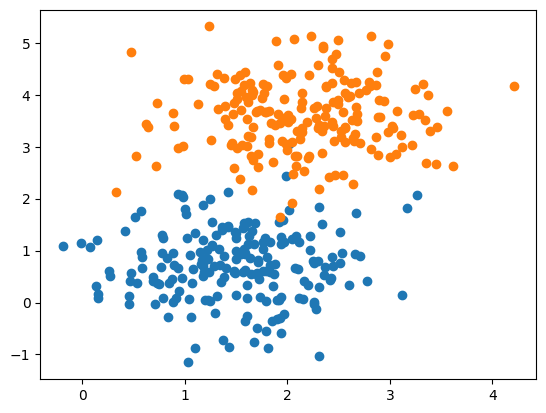

In [8]:
print(blobs_dataset.head())

#plot_dataset(blobs_dataset.loc[:, ["X1","X2","X3"]],blobs_dataset.loc[:, ["Class"]])
plot_dataset(blobs_dataset)

,X0,X1,Class
0,0.180647,0.552945,1
1,-0.188674,0.325629,1
2,0.413742,0.931251,0
3,-0.199223,0.902665,0
4,0.488279,-0.341202,1


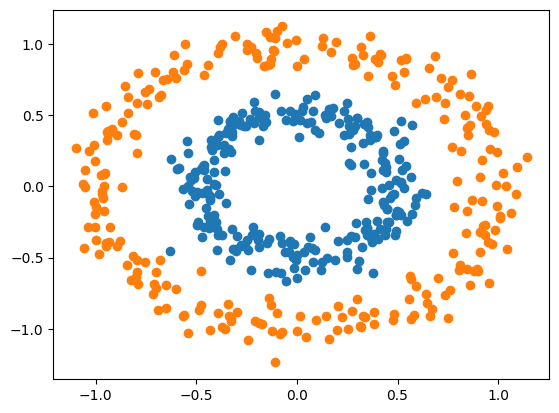

In [9]:
plot_dataset(circles_dataset)
circles_dataset.head()

**Training a Logistic Regression neuron on the circles dataset** (non- linearly separable)

Max iterations:  350000
Converged! after 16100 iterations 
Loss Per Epoch:  [array([[268.64619923]]), array([[260.58432239]]), array([[260.89971504]]), array([[249.56621759]]), array([[257.37718898]]), array([[255.86601827]]), array([[247.12121859]]), array([[240.35414098]]), array([[257.00670787]]), array([[248.87693303]]), array([[255.2499165]]), array([[251.24038049]]), array([[252.09462254]]), array([[246.30527437]]), array([[247.58444226]]), array([[246.05663362]]), array([[239.13117418]]), array([[246.01437043]]), array([[242.11528694]]), array([[241.09691155]]), array([[248.3195769]]), array([[252.41296016]]), array([[246.9678064]]), array([[240.09583599]]), array([[249.4545088]]), array([[245.56460325]]), array([[241.95640311]]), array([[241.09248947]]), array([[243.26263111]]), array([[245.09667394]]), array([[246.61342353]]), array([[246.86135563]]), array([[245.88457542]]), array([[246.34164502]]), array([[243.17190173]]), array([[246.68846679]]), array([[249.0481955]]), arr

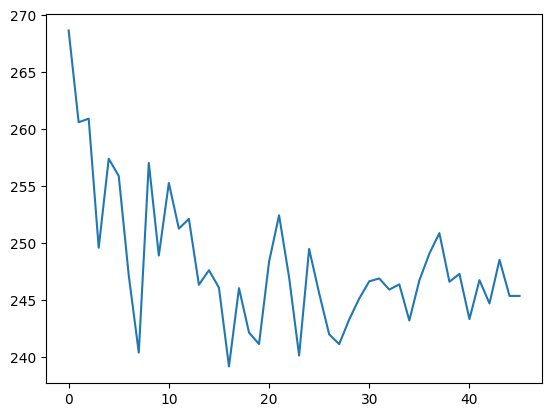

In [10]:
#initialising the LogisiticRegression Neuron
LR_Model_circles=LogisticRegressionNeuron(np.array(training_circles_X.iloc[[0]]).shape)

#setting training params
train_params={ "epochs":1000,"lr":0.001}

#training the model on the blobs dataset's training partition
train_model(LR_Model_circles,training_circles_X,training_circles_Y, train_params)

**Training a Logistic Regression neuron on the blobs dataset** (linearly separable)

Max iterations:  56000
Converged! after 16800 iterations 
Loss Per Epoch:  [array([[229.21499061]]), array([[199.04276433]]), array([[188.3040259]]), array([[180.01805929]]), array([[182.65094241]]), array([[179.57614618]]), array([[179.41361454]]), array([[175.0844639]]), array([[174.20692756]]), array([[177.87359127]]), array([[176.92660784]]), array([[173.94708331]]), array([[175.28212133]]), array([[172.38534126]]), array([[172.99317794]]), array([[174.01923802]]), array([[168.95664425]]), array([[166.54794425]]), array([[165.79277256]]), array([[175.42422639]]), array([[166.50149242]]), array([[159.52717163]]), array([[160.67978353]]), array([[164.76224505]]), array([[165.00626805]]), array([[164.56214727]]), array([[164.14366325]]), array([[160.70322095]]), array([[157.73493515]]), array([[161.92586127]]), array([[158.14287394]]), array([[160.90544262]]), array([[156.68417832]]), array([[157.6274809]]), array([[157.46288881]]), array([[154.8994798]]), array([[155.76640277]]), arr

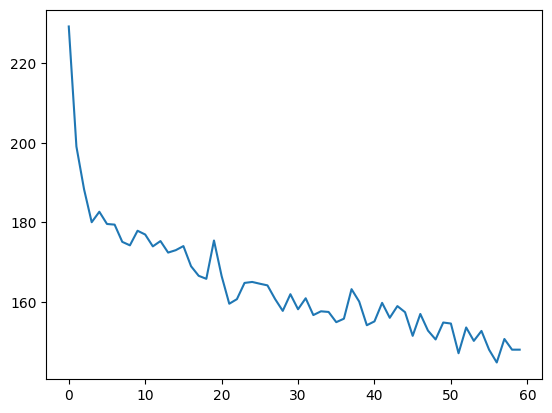

In [11]:
#initialising the LogisiticRegression Neuron
LR_Model=LogisticRegressionNeuron(np.array(training_blobs_X.iloc[[0]]).shape)

#setting training params
train_params={ "epochs":200,"lr":0.001}

#training the model on the blobs dataset's training partition
train_model(LR_Model,training_blobs_X,training_blobs_Y, train_params)

In [12]:
print("New weights matrix value:", LR_Model.weights)

New weights matrix value: [[-0.26910526 -0.27644649 -0.29228772]]


**Evaluating model accuracy on the blobs and circles datasets**

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

def evaluate_model(model, data,labels):

  if type(data) == np.ndarray:
    data = pd.DataFrame(data)

  predictions = []
  threshold = 0.5
  for i in range(data.shape[0]):
    if type(data) == np.ndarray:
      predictions.append((model.forward(np.squeeze(np.array(data[i])))).item())
    else:
      predictions.append((model.forward(np.squeeze(np.array(data.iloc[[i]])))).item())

  predicted_classes = [1 if probability >= threshold else 0 for probability in predictions]

  actual_classes = list(labels.values.ravel())
  #print(predicted_classes)

  matching_elements = sum(actual == pred for actual, pred in zip(actual_classes, predicted_classes))

  accuracy = matching_elements / len(predicted_classes) * 100

  print(f"Accuracy: {accuracy}")

  classification_report(labels,predicted_classes)
  ConfusionMatrixDisplay.from_predictions(labels,predicted_classes)
  plt.show()

  return predicted_classes

Accuracy: 81.66666666666667


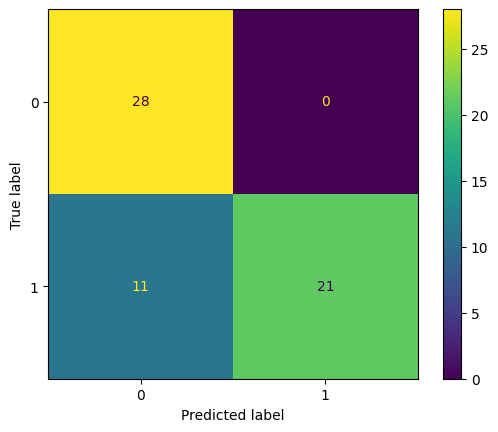

In [14]:
# Evaluating blobs model
blobs_val_preds=evaluate_model(LR_Model,val_blobs_X,val_blobs_Y)

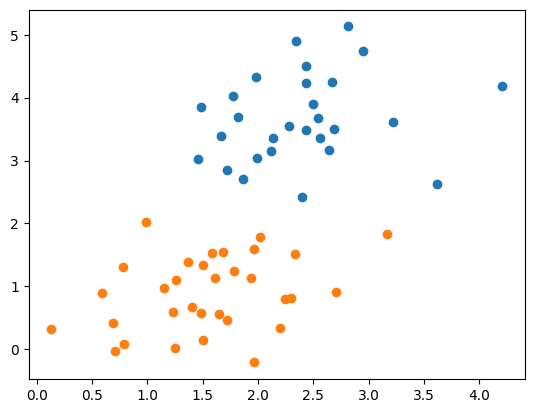

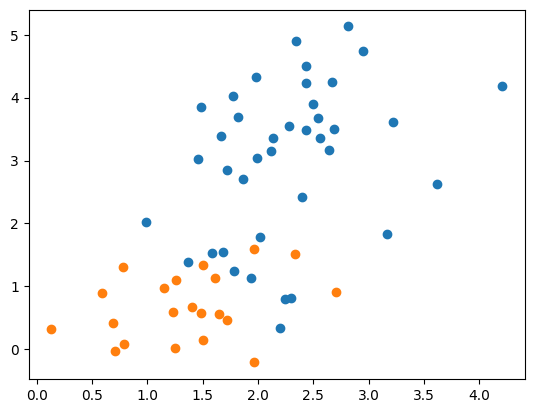

In [15]:
blobs_dataset_with_preds=val_blobs
blobs_dataset_with_preds["predictions"]=blobs_val_preds
plot_dataset(val_blobs,title="Ground-truth labels")
plt.show()
plot_dataset(blobs_dataset_with_preds,True,title="Predicted labels")
plt.show()

Accuracy: 52.0


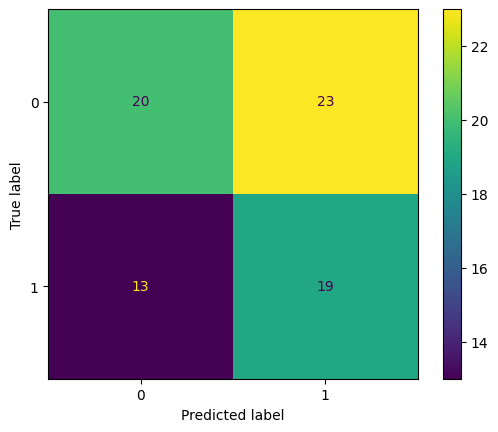

In [16]:
# Evaluating circles model
circles_val_preds=evaluate_model(LR_Model_circles, val_circles_X, val_circles_Y)

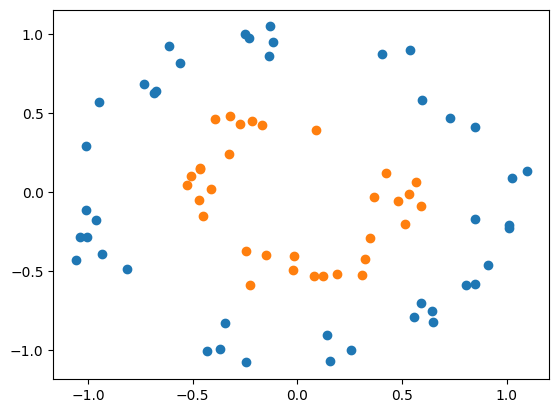

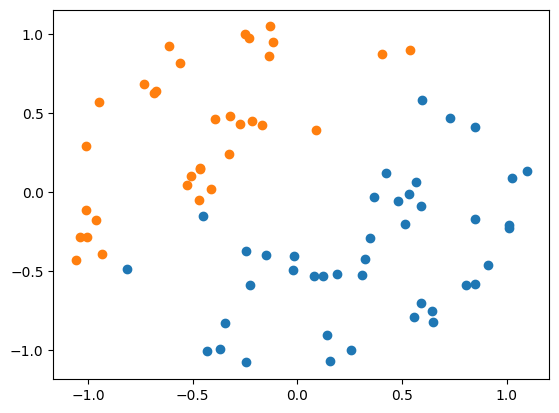

In [17]:
circles_dataset_with_preds=val_circles
circles_dataset_with_preds["predictions"]=circles_val_preds
plot_dataset(val_circles,title="Ground truth labels")
plt.show()
plot_dataset(circles_dataset_with_preds,True,title="Predicted labels")
plt.show()

### Section 3

In [18]:
#input -> insert(couple nodes in the hidden layer) -> output :)
class Section3NeuralNet:
  def __init__(self, data_shape,hidden_layer_size):

    #self.input_size= data.size

    #the hidden_layer_size defines the number of nodes that must be present in the hidden layer.
    self.hidden_layer_size=hidden_layer_size

    #obtaining the shape of the data to create a weights matrix of the same shape in each node of the hidden layer.
    self.data_shape=data_shape
    #print(self.data_shape)
    #making the hidden layer
    self.hidden_nodes=[]


    #list to store outputs from each layer (Excluding the output layer's outputs) (stored activation outputs (a^i))
    self.layer_outputs=[]

    #making the variable number of nodes in the single hidden layer
    for i in range(self.hidden_layer_size):
      self.hidden_nodes.append(LogisticRegressionNeuron(self.data_shape))

    #defining the output layer (which is also a logistic regression layer)
    #print("Output layer details: ")
    self.output_layer=LogisticRegressionNeuron((1,len(self.hidden_nodes)))


  def forward(self,data):

    hidden_layer_output=[]
    #send data through each of the nodes in the hidden layer and store their activation output
    for hidden_node in self.hidden_nodes:
      hidden_layer_output.append(hidden_node.forward(data))

    self.layer_outputs.append(np.concatenate(hidden_layer_output))
    #print(f"outputs: {self.layer_outputs[-1]} ")

    #shape of hidden layer activation output-> (num. of nodes in hidden layer, 1)
    #print("Shape of hidden layer activation output:", np.concatenate(hidden_layer_output).shape)

    #combine all the outputs from the hidden layer into a single matrix.
    output_layer_input = self.layer_outputs[-1]
    #sending the data into the output layer
    return self.output_layer.forward(output_layer_input) # this would need to be thresholded to obtain a class value of either 0 or 1

In [19]:
def f_prime(input):
  return 1/(1+np.exp(-input)) * (1- 1/(1+np.exp(-input)))

Implementing a training algorithm that uses SGD + Back-prop

BackProp:

  1.The Output layer:  
      First: ΔZ<sub>i</sub><sup>[L]</sup>= a<sub>i</sub><sup>[L]</sup> -y<sub>i</sub>.   
      Second: ΔW<sub>1,i</sub><sup>[L]</sup>=ΔZ<sub>1</sub><sup>[L]</sup> * a<sub>i</sub><sup>[L-1]</sup>.   
      Third: Δb<sub>1</sub><sup>[L]</sup>=ΔZ<sub>1</sub><sub>[L]</sub>

  2. The Hidden layers:

###The training algorithm:


In [20]:
def train_SGD_backprop(model,training_data_X,training_data_Y, training_params): #takes in model, all the training data and a dictionary of learning params.

  # SGD parameters
  epochs=training_params["epochs"]
  learning_rate=training_params["lr"]

  max_iterations= len(training_data_X)*epochs

  print("Max iterations: ",max_iterations)

  #probability threshold:
  threshold=0.5

  if type(training_data_X) != np.ndarray:
    samples=training_data_X.to_numpy()
  else:
    samples=training_data_X

  if type(training_data_Y) != np.ndarray:
    labels=training_data_Y.to_numpy()
  else:
    labels=training_data_Y

  iterations=0
  prev_loss=0
  running_loss=0

  loss_per_epoch=[]
  while iterations<max_iterations:

    #randomly choose a training sample from samples
    rand_sample_index=np.random.randint(len(samples))

    input_sample=np.array(samples[rand_sample_index])

    if input_sample.shape == (28,28):
      continue

    #print("Shape of input sample:",input_sample.shape)

    #input_sample -> for the should be of shape (1,num.attributes) as its a single row containing num.attributes columns

    #model output -> probability
    probability=model.forward(input_sample)

    #convert probability into label
    predicted_label=1 if probability>0.5 else 0

    curr_loss = -((labels[rand_sample_index]*np.log(probability)) + (1-labels[rand_sample_index]) * np.log(1-probability))

    #----------------------------------------------------------------------------------------------------------------------------------------------------
    #PERFORMING BACK-PROP:

    '''
    for j,node in enumerate(layer-1):
            calculation=pd_layer_costs[layer-1][j] * node.weights
            sum+=calculation

          delta_z_hidden= f_prime(hidden_node.weighted_sum) * sum

          delta_w_hidden=delta_z_hidden * model_layer_outputs_reversed[layer_idx-1] #calculated pd of z (previous line) times the input into this layer

          delta_b_hidden=delta_z_hidden'''

    # BACKPROP FOR THE OUTPUT LAYER:

    #partial derivative of Output layer's weighted sum (delta Z) -> activation output of the output layer - ground truth
    output_delta_z= probability-labels[rand_sample_index]

    #partial derivative of Output layer's Weights matrix (delta W) -> pd of output layer's output * most recent hidden layer's activation value

    output_delta_w= output_delta_z * model.layer_outputs[-1]

    #partial derivative of Output layer's bias
    delta_b_output= output_delta_z

    #----------------------------------------------------------------------------------------------------------------------------------------------

    #BACKPROP FOR THE HIDDEN LAYERS
    # looping through the hidden layers (in this case we just have the 1 hidden layer)
    pd_cost=[]
    pd_weights=[]
    pd_biases=[]

    #theres only 1 hidden layer so all the nodes belong to the same layer and layer +1 refers to the output layer
    for idx,hidden_node in enumerate(model.hidden_nodes): #all these nodes belong to the hidden layer

      #delta z for this node = activation value of this node
      #idx-> which node in current hidden layer

      #TO LOOK AT-> MODEL.OUTPUT_LAYER.WEIGHTS logically should be model.output_layer.weights[idx]
      delta_z_hidden= f_prime(hidden_node.weighted_sum) * np.sum(output_delta_z*model.output_layer.weights)

      #print(f"delta_z_hidden = {delta_z_hidden}")

      delta_w_hidden=delta_z_hidden * input_sample
      #print(f"delta_w_hidden = {delta_w_hidden}")


      #TO LOOK AT:
      delta_b_hidden=output_delta_z
      #print(f"delta_b_hidden = {delta_b_hidden}")

      pd_cost.append(delta_z_hidden)
      pd_weights.append(delta_w_hidden)
      pd_biases.append(delta_b_hidden)


    #UPDATING WEIGHTS

    #UPDATING WEIGHTS FOR THE OUTPUT LAYER
    print("---------------------------------------")
    print("Output_delta_w value:",output_delta_w)
    print("Output layer weight values:",model.output_layer.weights)

    #output_delta_w shape -> num nodes in previous layer,1
    for idx, weight in enumerate(model.output_layer.weights):
      print("\nWeight being updated:",model.output_layer.weights[idx])
      print("Value to be subtracted: ",learning_rate*output_delta_w[idx])
      print(f"New weight at {idx} is {model.output_layer.weights[idx]-(learning_rate * output_delta_w[idx])}")
      print("---------------------------------------")
      model.output_layer.weights[idx] -= learning_rate * output_delta_w[idx]

    model.output_layer.bias -= learning_rate * delta_b_output

    #UPDATING WEIGHTS FOR THE HIDDEN LAYER
    for idx, hidden_node in enumerate(model.hidden_nodes):
      #  print(f"weight = {hidden_node.weights[index]}")
        hidden_node.weights -= learning_rate * np.squeeze(pd_weights[idx])
       # print(f"new weight = {hidden_node.weights[index]}")
        hidden_node.bias -= learning_rate * np.squeeze(pd_biases[idx])

    iterations+=1

    running_loss += curr_loss

    #running_loss is loss per epoch
    if iterations%len(samples)==0:
      #print(f"{i/len(samples)} Epochs finished")
      loss_per_epoch.append(running_loss)
      #print(f"running_loss: {running_loss}, prev_loss: {prev_loss}, running-prev: {running_loss-prev_loss}")
      if (abs(running_loss-prev_loss)) < 10**-4: #latter condition is to check for convergence (change in weights is minimal)
        print(f"Converged! after {iterations} iterations ")
        iterations = max_iterations
      prev_loss = running_loss
      running_loss = 0

  #plotting training loss curve:
  print("Loss Per Epoch: ",loss_per_epoch)
  plt.plot([j for j in range(len(loss_per_epoch))], np.squeeze(loss_per_epoch))
  plt.show()



### Rewriting Training algorithm (Backprop + Gradient descent weight update)

In [21]:
def rewritten_train_SGD_backprop(model,training_data_X,training_data_Y, training_params): #takes in model, all the training data and a dictionary of learning params.

  # SGD parameters
  epochs=training_params["epochs"]
  learning_rate=training_params["lr"]

  max_iterations= len(training_data_X)*epochs

  print("Max iterations: ",max_iterations)

  #probability threshold:
  threshold=0.5

  if type(training_data_X) != np.ndarray:
    samples=training_data_X.to_numpy()
  else:
    samples=training_data_X

  if type(training_data_Y) != np.ndarray:
    labels=training_data_Y.to_numpy()
  else:
    labels=training_data_Y

  iterations=0
  prev_loss=0
  running_loss=0

  loss_per_epoch=[]

  while iterations<max_iterations:

    #randomly choose a training sample from samples
    rand_sample_index=np.random.randint(len(samples))

    input_sample=np.array(samples[rand_sample_index])
    input_sample=input_sample.reshape(-1, 1)

    #print(f"Input sample shape: {input_sample.shape}")

    if input_sample.shape == (28,28):
      continue

    #print("Shape of input sample:",input_sample.shape)

    #input_sample -> for the should be of shape (1,num.attributes) as its a single row containing num.attributes columns

    #model output -> probability
    probability=model.forward(input_sample)

    #convert probability into label
    predicted_label=1 if probability>0.5 else 0

    curr_loss = -((labels[rand_sample_index]*np.log(probability)) + (1-labels[rand_sample_index]) * np.log(1-probability))

    #----------------------------------------------------------------------------------------------------------------------------------------------------
    #PERFORMING BACK-PROP:


    #BackProp for Output Layer and Hidden Layer

      #OUTPUT LAYERS
      #delta z for output ->  pred -actual (scalar value)

      #delta w for output - > delta z for output @ output from previous layer.T (Transpose)

      #delta bias for output -> delta z for output

    delta_z_output= probability-labels[rand_sample_index]
    #print(f"Output layer delta z value: {delta_z_output} with a shape of {delta_z_output.shape}")

    delta_w_output= delta_z_output @ model.layer_outputs[-1].T
    #print(f"Output layer delta w value: {delta_w_output} with a shape of {delta_w_output.shape}")

    delta_b_output=delta_z_output
    #print(f"Output layer delta b value: {delta_b_output} with a shape of {delta_b_output.shape}")


      #HIDDEN LAYERS:

      #delta z for hidden layer= fprime() * deltaz_output @ weights of output layer.T (transpose)
      #delta w for hidden layer= input_sample.T (transpose) @ delta z for hidden layer
      #delta bias for hidden layer = delta z for hidden layer


    #only 1 hidden layer so we're going through the nodes
    delta_z_hidden_values=[]
    delta_w_hidden_values=[]
    delta_b_hidden_values=[]


    for node_idx,node in enumerate(model.hidden_nodes):
      sum=0
      #print(f"output layer weights shape:{model.output_layer.weights.shape}")
      for j,weight in enumerate(np.squeeze(model.output_layer.weights)):
        calculation=delta_z_output*weight
        sum+=calculation


      delta_z_hidden=f_prime(node.weighted_sum) * sum #np.dot(delta_z_output,model.output_layer.weights)
      #print(f"f_prime shape: {f_prime(node.weighted_sum).shape} and sum :{sum}")
      #print(f"Hidden layer delta z value: {delta_z_hidden} with a shape of {delta_z_hidden.shape}")

      #print(f"\n  Shape of input sample:{input_sample.shape}, shape of delta_z_hidden: {delta_z_hidden.shape}")
      delta_w_hidden=input_sample @ delta_z_hidden
      #print(f"Hidden layer delta w value: {delta_w_hidden} with a shape of {delta_w_hidden.shape}")

      delta_b_hidden=delta_z_hidden

      #print(f"Hidden layer delta b value: {delta_b_hidden} with a shape of {delta_b_hidden.shape}")

      delta_z_hidden_values.append(delta_z_hidden)
      delta_w_hidden_values.append(delta_w_hidden)
      delta_b_hidden_values.append(delta_b_hidden)


    #GRADIENT DESCENT
    #Performing gradient descent to update weights

    model.output_layer.weights-=learning_rate*delta_w_output
    model.output_layer.bias-=learning_rate*delta_b_output

    #print(f"delta w hidden values shape: {delta_w_hidden_values}")
    for node_idx,node in enumerate(model.hidden_nodes):

      #print(f"Node weights shape:{node.weights.shape}\ndelta_w_hidden_value shape:{delta_w_hidden_values[node_idx].shape}")

      weight_subtraction=learning_rate*delta_w_hidden_values[node_idx]
      #print(f"Weight to be subtracted shape: {weight_subtraction.shape}")

      node.weights-=weight_subtraction.T
      node.bias-=learning_rate*delta_b_hidden_values[node_idx]

    iterations+=1

    running_loss += curr_loss

    #running_loss is loss per epoch
    if iterations%len(samples)==0:
      #print(f"{i/len(samples)} Epochs finished")
      #print("An epoch was finished")
      loss_per_epoch.append(running_loss)
      #print(f"running_loss: {running_loss}, prev_loss: {prev_loss}, running-prev: {running_loss-prev_loss}")
      if (abs(running_loss-prev_loss)) < 10**-4: #latter condition is to check for convergence (change in weights is minimal)
        print(f"Converged! after {iterations} iterations ")
        iterations = max_iterations
      prev_loss = running_loss
      running_loss = 0

  #plotting training loss curve:
  print("Loss Per Epoch: ",loss_per_epoch)
  plt.plot([j for j in range(len(loss_per_epoch))], np.squeeze(loss_per_epoch))
  plt.show()



In [22]:
model_blobs=Section3NeuralNet(training_blobs_X.iloc[[0]].shape,10)

#setting training params
train_params={ "epochs":100,"lr":0.001}

print(model_blobs.output_layer.weights.shape)

#for idx, weight in enumerate(model_blobs.output_layer.weights):
 #     print(weight)
      #model.output_layer.weights[idx] -= learning_rate * output_delta_w[idx]

(1, 10)


Max iterations:  28000
Loss Per Epoch:  [array([[674.31799359]]), array([[422.77246151]]), array([[291.92306567]]), array([[224.8920505]]), array([[207.39876076]]), array([[187.35751275]]), array([[173.27714371]]), array([[170.25409415]]), array([[164.06674211]]), array([[162.30591501]]), array([[158.65034905]]), array([[154.09201968]]), array([[152.23803234]]), array([[149.03726296]]), array([[148.23515498]]), array([[144.52593095]]), array([[142.92213866]]), array([[137.98434569]]), array([[134.69735416]]), array([[132.76111741]]), array([[131.3569321]]), array([[126.47914731]]), array([[124.93675828]]), array([[121.919593]]), array([[119.978292]]), array([[117.64762919]]), array([[110.73189834]]), array([[111.85298872]]), array([[106.92109297]]), array([[107.02552554]]), array([[97.59725967]]), array([[100.79962579]]), array([[99.92811081]]), array([[102.36304147]]), array([[95.16700902]]), array([[92.61827843]]), array([[98.70536876]]), array([[91.33497041]]), array([[83.60358441]]

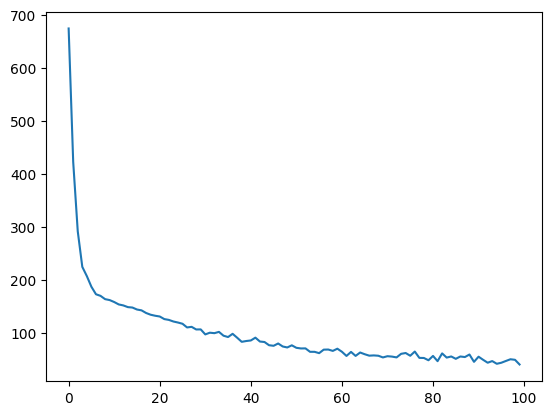

In [23]:
rewritten_train_SGD_backprop(model_blobs,training_blobs_X,training_blobs_Y,train_params)

Accuracy: 98.33333333333333


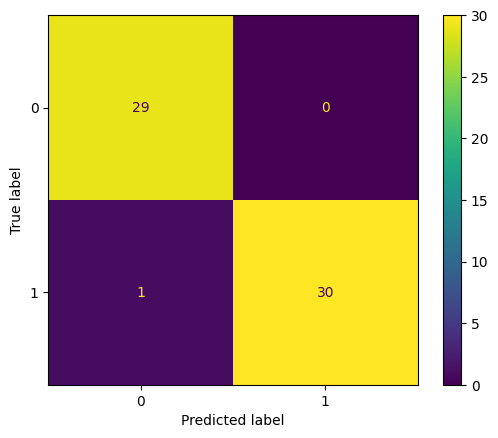

In [24]:
# Evaluating blobs neural net
preds_test_blob=evaluate_model(model_blobs,test_blobs_X,test_blobs_Y)

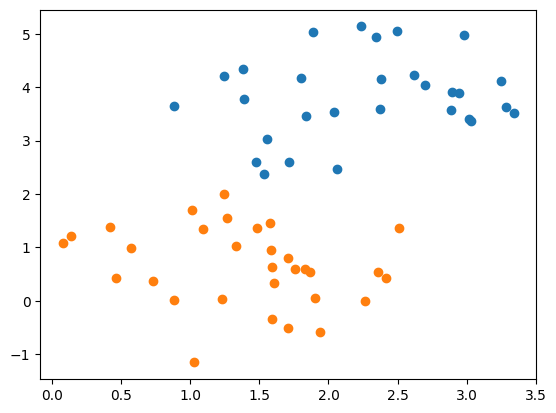

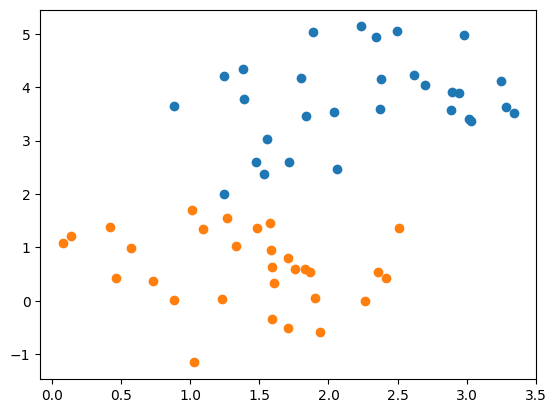

In [25]:
blobs_dataset_with_preds=test_blobs
blobs_dataset_with_preds["predictions"]=preds_test_blob
plot_dataset(test_blobs,title="Ground truth labels")
plt.show()
plot_dataset(blobs_dataset_with_preds,True,title="Predicted labels")
plt.show()

In [26]:
model_circles=Section3NeuralNet(training_circles_X.iloc[[0]].shape,10)

#setting training params
train_params={ "epochs":100,"lr":0.1}

Max iterations:  35000
Loss Per Epoch:  [array([[264.50680413]]), array([[246.61261482]]), array([[247.76747817]]), array([[243.83688789]]), array([[245.3766144]]), array([[247.63947258]]), array([[246.71413953]]), array([[243.74252372]]), array([[244.53850169]]), array([[244.02384189]]), array([[237.80080268]]), array([[234.94639706]]), array([[225.63272045]]), array([[180.73610271]]), array([[129.04512425]]), array([[91.30527268]]), array([[66.52071863]]), array([[50.84863611]]), array([[37.69298629]]), array([[32.3504997]]), array([[25.2800007]]), array([[23.47879334]]), array([[19.84579604]]), array([[18.69228889]]), array([[15.24304166]]), array([[15.22863805]]), array([[13.68285224]]), array([[11.68256626]]), array([[12.99365914]]), array([[10.68976936]]), array([[9.56140461]]), array([[9.13465584]]), array([[10.44413878]]), array([[8.69281724]]), array([[8.03492062]]), array([[8.22912719]]), array([[6.63866147]]), array([[6.18275544]]), array([[6.88150998]]), array([[6.50318926]

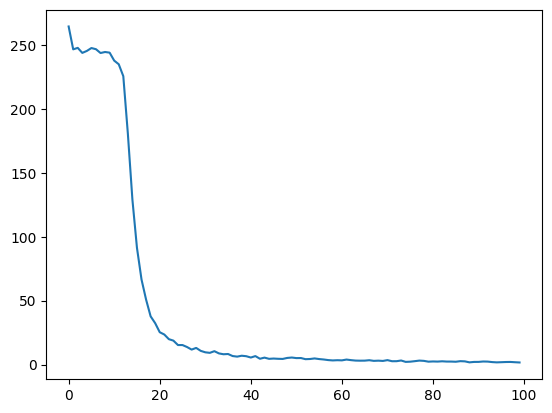

In [27]:
rewritten_train_SGD_backprop(model_circles,training_circles_X,training_circles_Y,train_params)

Accuracy: 98.66666666666667


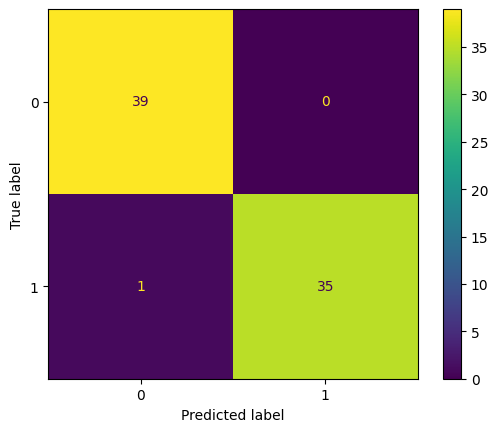

In [28]:
# Evaluating blobs neural net
preds_test_circle=evaluate_model(model_circles,test_circles_X,test_circles_Y)

#evaluate_model(model,training_circles_X,training_circles_Y)

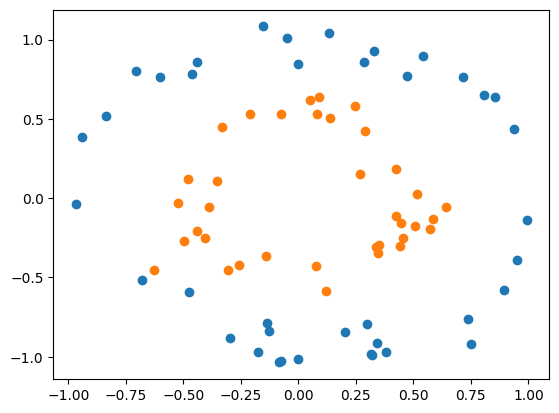

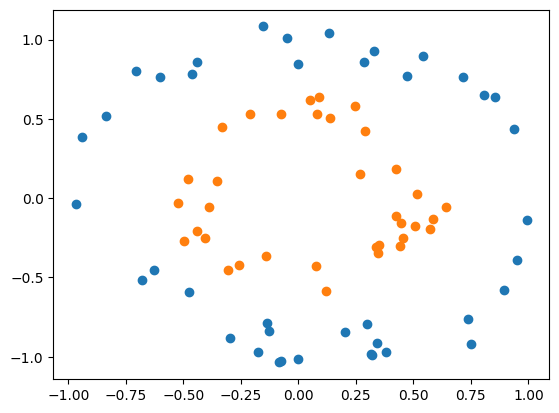

In [29]:
circles_dataset_with_preds=test_circles
circles_dataset_with_preds["predictions"]=preds_test_circle
plot_dataset(test_circles,title="Ground truth labels")
plt.show()
plot_dataset(circles_dataset_with_preds,True,title="Predicted labels")
plt.show()

### Section 4

In [ ]:
# This function taken directly from the Fashion-MNIST github site:
# https://github.com/zalandoresearch/fashion-mnist/blob/master/utils/mnist_reader.py

# Note: first arg is the path name, second is the file prefix, either 'train' or 't10k' (which is 10k of test data)
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels

# Loaded in this way, each of the batch files contains a dictionary with the following elements:
#   data -- a 10000x3072 numpy array of uint8s. Each row of the array stores a 32x32 colour image.
#           The first 1024 entries contain the red channel values, the next 1024 the green, and the final 1024 the blue.
#           The image is stored in row-major order, so that the first 32 entries of the array are the red channel values
#           of the first row of the image.
#   labels -- a list of 10000 numbers in the range 0-9.
#             The number at index i indicates the label of the ith image in the array data.

(train_imgs, train_labels) = load_mnist('', 'train')


In [ ]:
label_names = ['T-shirt/top', 'Trouser' , 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(f"Shape of images is {train_imgs.shape}, labels is {train_labels.shape}")

# Note: you should find your images is 60000 x 784, and labels is 60000 scalars.
# There are 60,000 images, and each image is a 28x28 = 784 pixels.
# Each label is a single value corresponding to T-shirt, Trouser, etc.

In [ ]:
print(train_imgs[654])

In [ ]:
def visualise(data, index):
    # MM Jan 2019: Given an MNIST data nparray and the index of an image, display the image.
    # Note that the images will be quite fuzzy looking, because they are low res (28x28).

    picture = data[index]

    # Initially, the data is a 1D array of 784 pixels; reshape it to a 2D array of 28x28 pixels
    picture.shape = (28,28)

    # Display it
    plt.imshow(picture, cmap='gray')
    plt.show()

In [ ]:
def normalise_image(image): #image should be a np array containing values from 0 to 255.
  normalised_image = np.zeros(image.shape)
  print(normalised_image.shape)
  maxPixelVal=np.max(image)
  minPixelVal=np.min(image)
  for idx,pixel in enumerate(image):
    normalised_image[idx]=(image[idx]-minPixelVal)/maxPixelVal-minPixelVal

  return normalised_image




In [ ]:
# Display a few images that we loaded
for i in range (100,120):
   visualise(train_imgs, i)
   print(f"Image {i} above: Class is {label_names[train_labels[i]]}, Class ID = {train_labels[i]}")

In [ ]:
train_labels_actual = []
train_imgs_actual = []

#Only considering the images that are the assigned classes (Ankle boot and sandal)
for index, value in enumerate(train_labels):
  if value == 5 or value == 9:
    train_labels_actual.append(value)
    train_imgs_actual.append(train_imgs[index])

visualise(train_imgs_actual, 13)

#Making sure only images that are the assigned classes are part of the data set (containing labels 5 and 9)
print(set(train_labels_actual))
print(len(train_labels_actual))
print(len(train_imgs_actual))

#changing labels to 0 and 1
for index, value in enumerate(train_labels_actual):
  if value == 5:
    train_labels_actual[index] = 0
  else:
    train_labels_actual[index] = 1

train_labels_actual_np = np.array(train_labels_actual)
train_imgs_actual_np = np.array(train_imgs_actual, dtype=np.ndarray)

#normalising the images using 0-1 normalisation

for idx,image in enumerate(train_imgs_actual_np):
  train_imgs_actual_np[idx]=normalise_image(image)


print(type(train_imgs_actual_np[0]))

In [ ]:
train_imgs_actual_np[0].shape

In [ ]:
#changing input shape from (784,) to (784,1)
input_shape = train_imgs_actual_np[0].reshape(-1, 1)

model_fashion=Section3NeuralNet(input_shape.T.shape,10)

#setting training params
train_params={ "epochs":50,"lr":0.01}

In [ ]:
rewritten_train_SGD_backprop(model_fashion,train_imgs_actual_np,train_labels_actual_np,train_params)

In [ ]:
def evaluate_model_mnist(model, data,labels):
  count = 0
  predictions = []
  threshold = 0.5
  for i in range(len(data)):

    if data[i].shape == (28,28):
      count +=1
      print(count)
      continue

    #if i%50 == 0: print(f"images processed: {i}")

    predictions.append((model.forward(np.squeeze(data[i]))))

  predicted_classes = [1 if probability >= threshold else 0 for probability in predictions]

  print(f"count of bad images:{count}")

  actual_classes = list(labels)
  print(predicted_classes)

  matching_elements = sum(actual == pred for actual, pred in zip(actual_classes, predicted_classes))

  accuracy = matching_elements / len(predicted_classes) * 100

  print(f"Accuracy: {accuracy}")

In [ ]:
evaluate_model_mnist(model_fashion,train_imgs_actual_np,train_labels_actual_np)

In [ ]:
plot

### Section 5- Lukasz 19502109

In [ ]:
#input -> insert(couple nodes in the hidden layer) -> output :)
class Section5NeuralNet_L:
  def __init__(self,data_shape,hidden_layer_sizes):
    #the hidden_layer_size defines the number of nodes that must be present in the hidden layer.
    self.hidden_layer_sizes=hidden_layer_sizes

    #obtaining the shape of the data to create a weights matrix of the same shape in each node of the hidden layer.
    self.data_shape=data_shape
    #making the hidden layers
    self.hidden_layers=[]

    #list to store outputs from each layer (Excluding the output layer's outputs) (stored activation outputs (a^i))
    self.layer_outputs=[]

    #making the variable number of nodes in the single hidden layer
    for layer_size in self.hidden_layer_sizes:
      #If this is wrong then make each layer's shape the amount of nodes in the previous layer
        layer = [LogisticRegressionNeuron(self.data_shape) for _ in range(layer_size)]
        self.hidden_layers.append(layer)

    #defining the output layer (which is also a logistic regression layer)
    self.output_layer=LogisticRegressionNeuron((1,self.hidden_layer_sizes[-1]))


  def forward(self,data):

    #send data through each of the nodes in the hidden layer and store their activation output
    for hidden_layer in self.hidden_layers:
      hidden_layer_input = data # first input is the data itself, layer_input updated later to be the previous layers output
      hidden_layer_output=[]
      for node in hidden_layer:
        hidden_layer_output.append(node.forward(hidden_layer_input))
      hidden_layer_input=np.concatenate(hidden_layer_output)
      self.layer_outputs.append(np.concatenate(hidden_layer_output))


    #combine all the outputs from the hidden layer into a single matrix.
    output_layer_input = self.layer_outputs[-1]
    #sending the data into the output layer
    return self.output_layer.forward(output_layer_input) # this would need to be thresholded to obtain a class value of either 0 or 1

In [ ]:
def train_SGD_backprop_deep_lukasz(model, training_data_X, training_data_Y, training_params):
    epochs = training_params["epochs"]
    learning_rate = training_params["lr"]

    max_iterations = len(training_data_X) * epochs

    print("Max iterations: ", max_iterations)
    threshold = 0.5

    if type(training_data_X) != np.ndarray:
        samples = training_data_X.to_numpy()
    else:
        samples = training_data_X

    if type(training_data_Y) != np.ndarray:
        labels = training_data_Y.to_numpy()
    else:
        labels = training_data_Y

    iterations = 0
    prev_loss = 0
    running_loss = 0

    loss_per_epoch = []
    while iterations < max_iterations:
        # randomly choose a training sample from samples
        rand_sample_index = np.random.randint(len(samples))

        input_sample = np.array(samples[rand_sample_index])

        if input_sample.shape == (28, 28):
            continue

        probability = model.forward(input_sample)

        predicted_label = 1 if probability > 0.5 else 0

        curr_loss = -((labels[rand_sample_index] * np.log(probability)) + (1 - labels[rand_sample_index]) * np.log(1 - probability))

        delta_z_output= probability-labels[rand_sample_index]
        delta_w_output= delta_z_output @ model.layer_outputs[-1].T
        delta_b_output=delta_z_output

        # BACKPROP FOR THE HIDDEN LAYERS
        # looping through the hidden layers (in this case we just have the 1 hidden layer)
        delta_layer_costs=[] #list of lists where len(list)=num hidden layers and list[0] would have the pd z values for all nodes in a hidden layer (reverse list)
        delta_layer_weights=[]
        delta_layer_biases=[]

        delta_z_hidden_values=[]
        delta_w_hidden_values=[]
        delta_b_hidden_values=[]

        for l,layer in enumerate(reversed(model.hidden_layers)):
          if l==0: # the hidden layer attached to the output layer
            for idx,node in enumerate(layer):
              sum=0
              for j,weight in enumerate(np.squeeze(model.output_layer.weights)):
                calculation=delta_z_output*weight
                sum+=calculation

              delta_z_hidden=f_prime(node.weighted_sum) * sum
              delta_w_hidden=model.layer_outputs[-2] @ delta_z_hidden
              delta_b_hidden=delta_z_hidden

              delta_z_hidden_values.append(delta_z_hidden)
              delta_w_hidden_values.append(delta_w_hidden)
              delta_b_hidden_values.append(delta_b_hidden)

            #storing all calculations for all nodes in this layer
            delta_layer_costs.append(delta_z_hidden_values)
            delta_layer_weights.append(delta_w_hidden_values)
            delta_layer_biases.append(delta_b_hidden_values)

          elif l==len(model.hidden_layers): # first hidden layer (attached to inputs)
            for idx, hidden_node in enumerate(layer):
                sum=0
                for j,weight in enumerate(np.squeeze(hidden_node.weights)):
                  calculation=delta_z_hidden*weight
                  sum+=calculation

                delta_z_hidden=f_prime(node.weighted_sum) * sum
                delta_w_hidden=model.input_sample @ delta_z_hidden
                delta_b_hidden=delta_z_hidden

                delta_z_hidden_values.append(delta_z_hidden)
                delta_w_hidden_values.append(delta_w_hidden)
                delta_b_hidden_values.append(delta_b_hidden)

            #storing all calculations for all nodes in this layer
            delta_layer_costs.append(delta_z_hidden_values)
            delta_layer_weights.append(delta_w_hidden_values)
            delta_layer_biases.append(delta_b_hidden_values)

          else: # the inbetween layers
            for idx, hidden_node in enumerate(layer):
                sum=0
                for j,weight in enumerate(np.squeeze(hidden_node.weights)):
                  calculation=delta_z_hidden*weight
                  sum+=calculation

                delta_z_hidden=f_prime(node.weighted_sum) * sum
                delta_w_hidden=model.layer_outputs[-1-l] @ delta_z_hidden
                delta_b_hidden=delta_z_hidden

                delta_z_hidden_values.append(delta_z_hidden)
                delta_w_hidden_values.append(delta_w_hidden)
                delta_b_hidden_values.append(delta_b_hidden)

            #storing all calculations for all nodes in this layer
            delta_layer_costs.append(delta_z_hidden_values)
            delta_layer_weights.append(delta_w_hidden_values)
            delta_layer_biases.append(delta_b_hidden_values)

        model.output_layer.weights-=learning_rate*delta_w_output
        model.output_layer.bias-=learning_rate*delta_b_output

        for lidx,layer in enumerate(model.hidden_layers):
            for idx, node in enumerate(layer):
                weight_subtraction=learning_rate*delta_layer_weights[lidx][idx]
                node.weights-=weight_subtraction.T
                node.bias-=learning_rate*delta_layer_biases[lidx][idx]

        iterations += 1
        running_loss += curr_loss
        if iterations % len(samples) == 0:
            loss_per_epoch.append(running_loss)
            if (abs(running_loss - prev_loss)) < 10 ** -4:  # latter condition is to check for convergence (change in weights is minimal)
                print(f"Converged! after {iterations} iterations ")
                iterations = max_iterations
            prev_loss = running_loss
            running_loss = 0
    print("Loss Per Epoch: ", loss_per_epoch)
    plt.plot([j for j in range(len(loss_per_epoch))], np.squeeze(loss_per_epoch))
    plt.show()


In [ ]:
model_blobs_5=Section5NeuralNet_L(training_blobs_X.iloc[[0]].shape, [5,3,2])

#setting training params
train_params={ "epochs":200,"lr":0.01}

In [ ]:
train_GPT_backprop_L(model_blobs_5, training_blobs_X, training_blobs_Y, train_params)

In [ ]:
evaluate_model(model_blobs_5, val_blobs_X, val_blobs_Y)

# Section 5- Srinivas Ilancheran, 19280039

In [31]:
#input -> insert(couple nodes in the hidden layer) -> output :)
class Srinivas_Section5NeuralNet:
  def __init__(self, data_shape,hidden_layer_nodes): # hidden_layer_nodes= [number of nodes in HL1, number of nodes in HL2,..]

    #obtaining the shape of the data to create a weights matrix of the same shape in each node of the first hidden layer.
    self.data_shape=data_shape

    #making the hidden layers
    self.hidden_layers=[]

    #loop to make the hidden layers

    for layer in range(len(hidden_layer_nodes)): #making len(hidden_layer_nodes) layers, where hidden_layer_nodes is a list of lists

      layer_nodes=[] #used to store the created nodes for current layer

      for node_count in range(hidden_layer_nodes[layer]): #loop through the node counts provided for each layer

        if layer==0: #weights matrix shape for the nodes in this layer = input size
          layer_nodes.append( LogisticRegressionNeuron(data_shape=self.data_shape))

        else:
          layer_nodes.append(LogisticRegressionNeuron(data_shape=(1,hidden_layer_nodes[layer-1])))

      self.hidden_layers.append(layer_nodes)

    #list to store outputs from each layer (Excluding the output layer's outputs) (stored activation outputs (a^i))
    self.layer_outputs=[]

    #defining the output layer (which is also a logistic regression layer)
    num_nodes_lastHL=hidden_layer_nodes[len(hidden_layer_nodes)-1]
    print("Number of nodes in last hidden layer:",num_nodes_lastHL)

    self.output_layer=LogisticRegressionNeuron((1,num_nodes_lastHL))

  def model_overview(self):

    print("Printing out model architecture")

    print(f" Input layer (not part of model) dimensions: {self.data_shape}")
    print("Hidden layers: ")

    for layer_idx,layer in enumerate(self.hidden_layers):
      print(f"Layer:{layer_idx} has {len(layer)} nodes")

    print(f"Output layer has 1 Node with weights shape {self.output_layer.shape}")


  def forward(self,data):

    for layer,nodes in enumerate(self.hidden_layers):
      hidden_layer_output=[] # used to store the output of a layer

      if layer==0: #if layer is first hidden layer, input into each of the nodes is the input image/ input data
        for node in nodes:
          hidden_layer_output.append(node.forward(data))
        self.layer_outputs.append(np.concatenate(hidden_layer_output)) #used to store the outputs of each layer, including output layer

      else:#if layer is not the first hidden layer, input into each of its nodes is the output of the previous layer
        for node in nodes:
          hidden_layer_output.append(node.forward(self.layer_outputs[layer-1]))
        self.layer_outputs.append(np.concatenate(hidden_layer_output))



    #output layer input is all the outputs from the last hidden layers (combined into a single matrix).
    output_layer_input = self.layer_outputs[-1]
    #sending the data into the output layer
    return self.output_layer.forward(output_layer_input) # this would need to be thresholded to obtain a class value of either 0 or 1

In [89]:
def Srinivas_train_SGD_backprop_deep(model,training_data_X,training_data_Y, training_params): #takes in model, all the training data and a dictionary of learning params.

  # SGD parameters
  epochs=training_params["epochs"]
  learning_rate=training_params["lr"]

  max_iterations= len(training_data_X)*epochs

  print("Max iterations: ",max_iterations)

  #probability threshold:
  threshold=0.5

  if type(training_data_X) != np.ndarray:
    samples=training_data_X.to_numpy()
  else:
    samples=training_data_X

  if type(training_data_Y) != np.ndarray:
    labels=training_data_Y.to_numpy()
  else:
    labels=training_data_Y

  iterations=0
  prev_loss=0
  running_loss=0

  loss_per_epoch=[]

  while iterations<max_iterations:

    #randomly choose a training sample from samples
    rand_sample_index=np.random.randint(len(samples))

    input_sample=np.array(samples[rand_sample_index])
    input_sample=input_sample.reshape(-1, 1)

    #print(f"Input sample shape: {input_sample.shape}")

    if input_sample.shape == (28,28):
      continue

    #print("Shape of input sample:",input_sample.shape)

    #input_sample -> for the should be of shape (1,num.attributes) as its a single row containing num.attributes columns

    #model output -> probability
    probability=model.forward(input_sample)

    #convert probability into label
    predicted_label=1 if probability>0.5 else 0

    curr_loss = -((labels[rand_sample_index]*np.log(probability)) + (1-labels[rand_sample_index]) * np.log(1-probability))

    #----------------------------------------------------------------------------------------------------------------------------------------------------
    #PERFORMING BACK-PROP:


    #TO DO *******************************************

    #BackProp for Output Layer and Hidden Layer

      #OUTPUT LAYERS
      #delta z for output ->  pred -actual (scalar value)

      #delta w for output - > delta z for output @ output from previous layer.T (Transpose)

      #delta bias for output -> delta z for output

    delta_z_output= probability-labels[rand_sample_index]
    #print(f"Output layer delta z value: {delta_z_output} with a shape of {delta_z_output.shape}")

    delta_w_output= delta_z_output @ model.layer_outputs[-1].T
    #print(f"Output layer delta w value: {delta_w_output} with a shape of {delta_w_output.shape}")

    delta_b_output=delta_z_output
    #print(f"Output layer delta b value: {delta_b_output} with a shape of {delta_b_output.shape}")


    #HIDDEN LAYERS:

    #delta z for hidden layer= fprime() * deltaz of next_layer @ weights of next_layer.T (transpose)
    #delta w for hidden layer= input into this layer.T (transpose) @ delta z for hidden layer
    #delta bias for hidden layer = delta z for hidden layer

    delta_layer_costs=[] #list of lists where len(list)=num hidden layers and list[0] would have the pd z values for all nodes in a hidden layer (reverse list)
    delta_layer_weights=[]
    delta_layer_biases=[]


    model_hidden_layers_reversed=list(reversed(model.hidden_layers))
    model_layer_outputs_reversed=list(reversed(model.layer_outputs))

    '''
    layers= [[nodes in layer] [nodes in layer] [nodes in layer]]

    after reversing

    layers= [last hidden layer, hidden layer3, hidden layer2, first hidden layer]

    layer after current layer -> idx-1
    layer before current layer -> idx+1
    '''

    for layer_idx,layer in enumerate(model_hidden_layers_reversed):

      delta_z_hidden_values=[]
      delta_w_hidden_values=[]
      delta_b_hidden_values=[]

      #print("Layer's nodes:",layer)

      if layer_idx==0 and len(model_hidden_layers_reversed)!=1: #last hidden layer

        #print("In last hidden layer")
        for node_idx,node in enumerate(layer):
          sum=0
          #print(f"output layer weights shape:{model.output_layer.weights.shape}")
          for j,weight in enumerate(np.squeeze(model.output_layer.weights)):
            calculation=delta_z_output*weight
            sum+=calculation

          #print(f"f_prime shape: {f_prime(node.weighted_sum).shape} and sum :{sum}")
          delta_z_hidden=f_prime(node.weighted_sum) * sum
          delta_w_hidden=model_layer_outputs_reversed[layer_idx+1] @ delta_z_hidden
          delta_b_hidden=delta_z_hidden

          #print(f"Hidden layer delta z value: {delta_z_hidden} with a shape of {delta_z_hidden.shape}")
          #print(f"Hidden layer delta w value: {delta_w_hidden} with a shape of {delta_w_hidden.shape}")
          #print(f"Hidden layer delta b value: {delta_b_hidden} with a shape of {delta_b_hidden.shape}")

          #add delta values for this node to list having all delta values for the nodes in the last layer
          delta_z_hidden_values.append(delta_z_hidden)
          delta_w_hidden_values.append(delta_w_hidden)
          delta_b_hidden_values.append(delta_b_hidden)

          #print(f"Last hidden layer delta z values:{delta_z_hidden_values}")
          #print(f"Last hidden layer delta w values:{delta_w_hidden_values}")
          #print(f"Last hidden layer delta b values:{delta_b_hidden_values}")
          #print("-------------------------------------------")
          #print("\n")

        #all delta values of the last layer
        delta_layer_costs.append(delta_z_hidden_values)
        delta_layer_weights.append(delta_w_hidden_values)
        delta_layer_biases.append(delta_b_hidden_values)

      elif layer_idx==(len(model_hidden_layers_reversed)-1): #first hidden layer

        #print("In first hidden layer")
        for node_idx,node in enumerate(layer): # [l1n1,l1n2] [l2n1,l2n2,l2n3,l2n4]
          sum=0
          #print(f"output layer weights shape:{model.output_layer.weights.shape}")
          for j_node_idx,next_layer_node in enumerate(model_hidden_layers_reversed[layer_idx-1]):

            for j,weight in enumerate(np.squeeze(next_layer_node.weights)):
                calculation=delta_layer_costs[-1][j_node_idx]*weight
                sum+=calculation

          '''
          delta_z_hidden= current node's weighted sum * summation of this node's
          delta_w_hidden= previous layer's output @ delta_z_hidden
          '''

          delta_z_hidden=f_prime(node.weighted_sum) * sum


          delta_w_hidden=input_sample @ delta_z_hidden
          delta_b_hidden=delta_z_hidden

          #print(f"f_prime shape: {f_prime(node.weighted_sum).shape} and sum :{sum}")
          #print(f"Hidden layer delta z value: {delta_z_hidden} with a shape of {delta_z_hidden.shape}")
          #print(f"Hidden layer delta w value: {delta_w_hidden} with a shape of {delta_w_hidden.shape}")
          #print(f"Hidden layer delta b value: {delta_b_hidden} with a shape of {delta_b_hidden.shape}")

          delta_z_hidden_values.append(delta_z_hidden)
          delta_w_hidden_values.append(delta_w_hidden)
          delta_b_hidden_values.append(delta_b_hidden)

          #if node_idx==0:
            #print(f"First hidden layer delta z values:{delta_z_hidden_values}")
            #print(f"First hidden layer delta w values:{delta_w_hidden_values}")
            #print(f"First hidden layer delta b values:{delta_b_hidden_values}")
            #print("-------------------------------------------")
            #print("\n")

        delta_layer_costs.append(delta_z_hidden_values)
        delta_layer_weights.append(delta_w_hidden_values)
        delta_layer_biases.append(delta_b_hidden_values)

        #print("Accessing this layer's delta weights")

        #print("First node in this layer's delta w should be:",delta_layer_weights[layer_idx][0])


      else: # for other layers
        #print("In hidden layer that is neither first or last")

        for node_idx,node in enumerate(layer):
          sum=0
          #print(f"output layer weights shape:{model.output_layer.weights.shape}")
          for j_node_idx,next_layer_node in enumerate(model_hidden_layers_reversed[layer_idx-1]):

            for j,weight in enumerate(np.squeeze(next_layer_node.weights)):
                calculation=delta_layer_costs[-1][j_node_idx]*weight
                sum+=calculation


          delta_z_hidden=f_prime(node.weighted_sum) * sum

          #print(f"f_prime shape: {f_prime(node.weighted_sum).shape} and sum :{sum}")
          #print(f"Hidden layer delta z value: {delta_z_hidden} with a shape of {delta_z_hidden.shape}")

          delta_w_hidden=model_layer_outputs_reversed[layer_idx+1]@ delta_z_hidden
          #print(f"Hidden layer delta w value: {delta_w_hidden} with a shape of {delta_w_hidden.shape}")

          delta_b_hidden=delta_z_hidden

          #print(f"Hidden layer delta b value: {delta_b_hidden} with a shape of {delta_b_hidden.shape}")

          delta_z_hidden_values.append(delta_z_hidden)
          delta_w_hidden_values.append(delta_w_hidden)
          delta_b_hidden_values.append(delta_b_hidden)

        #storing all calculations for all nodes in this layer
        delta_layer_costs.append(delta_z_hidden_values)
        delta_layer_weights.append(delta_w_hidden_values)
        delta_layer_biases.append(delta_b_hidden_values)

    '''Things to look at in the morning

      change delta_layer_costs[layer_idx+1][node] to just delta_layer_costs[-1]

    '''
    #print("Updating weights!, backprop over!")
    #updating weights for output layer
    model.output_layer.weights-=learning_rate*delta_w_output
    model.output_layer.bias-=learning_rate*delta_b_output

    #updating weights for hidden layers

    #delta_layer arrays are in reverse order.
    #So for gradient's for the first layer, it is the last index of delta_layer_weights and delta_layer_biases
    # or we can just reverse the delta_layer_weights and delta_layer_biases arrays and iterate through model.hidden layers in order

    reversed_delta_layer_weights=list(reversed(delta_layer_weights))
    reversed_delta_layer_biases=list(reversed(delta_layer_biases))

    for layer_idx,layer in enumerate(model.hidden_layers):
      print("------------------------------------------------------------------------------------")
      print(f"\nLayer:{layer_idx} having nodes: {len(layer)}")
      for node_idx,node in enumerate(layer):

        #print(f"------------Node {node_idx} of layer {layer_idx}")
        #print(f"delta_layer_weights: {reversed_delta_layer_weights[layer_idx][node_idx]} and their shape {reversed_delta_layer_weights[layer_idx][node_idx].shape}")
        #print(f"Shape of node weights: {node.weights.shape}")
        #print(f"Weight of node before update: {node.weights}")
        #print(f"Value to be subtracted: {learning_rate*reversed_delta_layer_weights[layer_idx][node_idx]}")

        weights_subtraction=learning_rate*reversed_delta_layer_weights[layer_idx][node_idx]
        node.weights-=weights_subtraction.T

        print(f"Weight of node after update: {node.weights}")
        node.bias-=learning_rate*reversed_delta_layer_biases[layer_idx][node_idx]


    iterations+=1

    running_loss += curr_loss

    #running_loss is loss per epoch
    if iterations%len(samples)==0:
      print(f"{iterations/len(samples)} Epochs finished")
      #print("An epoch was finished")
      loss_per_epoch.append(running_loss)
      #print(f"running_loss: {running_loss}, prev_loss: {prev_loss}, running-prev: {running_loss-prev_loss}")
      if (abs(running_loss-prev_loss)) < 10**-4: #latter condition is to check for convergence (change in weights is minimal)
        print(f"Converged! after {iterations} iterations ")
        iterations = max_iterations
      prev_loss = running_loss
      running_loss = 0

  #plotting training loss curve:
  print("Loss Per Epoch: ",loss_per_epoch)
  plt.plot([j for j in range(len(loss_per_epoch))], np.squeeze(loss_per_epoch))
  plt.show()



Streaming output truncated to the last 5000 lines.
------------------------------------------------------------------------------------

Layer:0 having nodes: 6
------------Node 0 of layer 0
delta_layer_weights: [[0.06820875]
 [0.01025309]
 [0.03133847]] and their shape (3, 1)
Shape of node weights: (1, 3)
Weight of node before update: [[0.04580791 0.6459257  0.40155961]]
Value to be subtracted: [[0.00682088]
 [0.00102531]
 [0.00313385]]
Weight of node after update: [[0.03898704 0.64490039 0.39842576]]
------------Node 1 of layer 0
delta_layer_weights: [[0.01177587]
 [0.00177014]
 [0.00541042]] and their shape (3, 1)
Shape of node weights: (1, 3)
Weight of node before update: [[0.92271362 0.96768299 0.17853195]]
Value to be subtracted: [[0.00117759]
 [0.00017701]
 [0.00054104]]
Weight of node after update: [[0.92153603 0.96750598 0.1779909 ]]
------------Node 2 of layer 0
delta_layer_weights: [[0.09154275]
 [0.01376064]
 [0.04205925]] and their shape (3, 1)
Shape of node weights: (1, 3

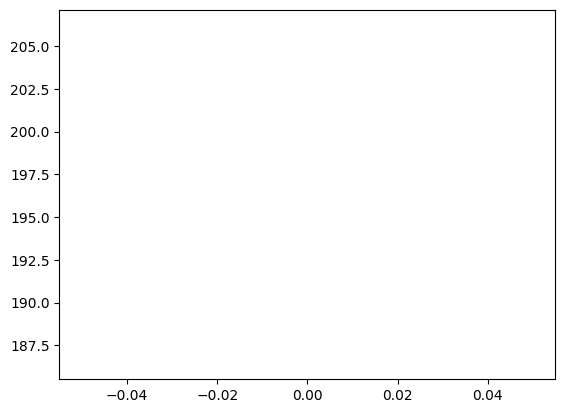

In [90]:
blobs_S5_Srinivas=Srinivas_Section5NeuralNet(data_shape=training_blobs_X.iloc[[0]].shape,hidden_layer_nodes=[6,2])

#setting training params
train_params={ "epochs":1,"lr":0.1}

'''for layer_idx,layer in enumerate(blobs_S5_Srinivas.hidden_layers):
  print(f"Layer: {layer_idx}")
  for node_idx,node in enumerate(layer):
    print(f"Node weights: {node.weights}")'''

Srinivas_train_SGD_backprop_deep(blobs_S5_Srinivas,training_blobs_X,training_blobs_Y,train_params)

Accuracy: 51.66666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


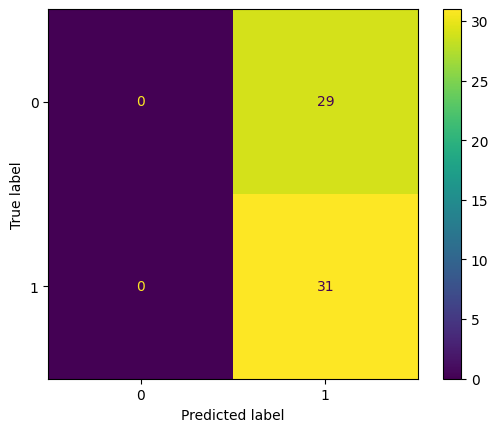

In [73]:
# Evaluating blobs neural net
preds_test_blob=evaluate_model(blobs_S5_Srinivas,test_blobs_X,test_blobs_Y)

In [ ]:
fashion_model_Section5_Srinivas=Srinivas_Section5NeuralNet(train_imgs_actual_np[0].shape,hidden_layer_nodes=[5,2,3])

#setting training params
train_params={ "epochs":1,"lr":0.001}

Srinivas_train_SGD_backprop_deep(model_fashion,train_imgs_actual_np,train_labels_actual_np,train_params)